In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

In [2]:
# Change the parameter of algorithm to suit our needs

In [4]:
# Decision Tree - 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [ ]:
#1. Max Depth

In [7]:
dataset = load_iris()
df = pd.DataFrame(data = dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

In [8]:
df.head()

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [10]:
train_df, test_df = train_test_split(df, test_size=0.1)

In [ ]:
# 1. Max Depth - 
# 2. Max Feature - 

In [38]:
dtc = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)#, max_features=2, min_samples_split=10, )
dtc.fit(train_df.drop(columns=['target']), train_df.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

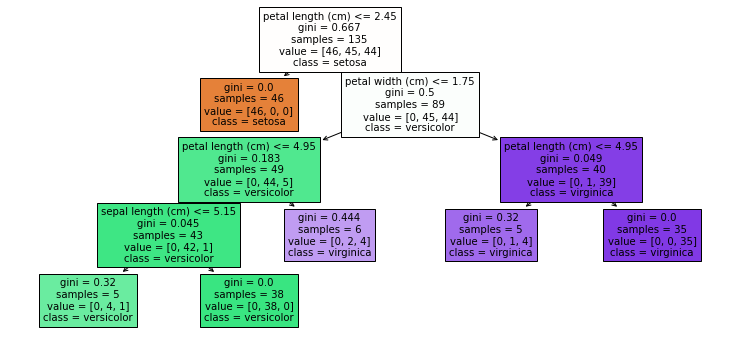

In [39]:
plt.figure(figsize=(13, 6))
plot_tree(dtc, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names)
plt.show()

In [40]:
dtc.max_depth

4

In [37]:
dtc.feature_importances_

array([0.        , 0.01504011, 0.05613085, 0.92882905])

In [43]:
dt_base = DecisionTreeClassifier()

In [41]:
# GridSearchCV 
params = {
    'max_depth' : [4,5],
    'min_samples_leaf' : [3,4,5],
    'max_features' : [2,3,4],
    'min_samples_split': [2,3,4,5,6,7,8,9,10]
}

In [42]:
from sklearn.model_selection import GridSearchCV

In [44]:
from multiprocessing import cpu_count
cpu_count()

2

In [45]:
gscv = GridSearchCV(dt_base, param_grid=params, scoring="accuracy", n_jobs=2, verbose=1)

In [46]:
gscv.fit(X=train_df.drop(columns=['target']), y=train_df.target)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 584 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 810 out of 810 | elapsed:    3.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'max_depth': [4, 5], 'max_features': [2, 3, 4],
     

In [50]:
scores = pd.DataFrame(gscv.cv_results_)
scores.head()

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.002562      0.000354  ...        0.027716               49
1       0.002326      0.000106  ...        0.033127               67
2       0.002564      0.000826  ...        0.029630               28
3       0.002823      0.001463  ...        0.055432               16
4       0.002045      0.000122  ...        0.037771               28

[5 rows x 17 columns]

In [49]:
gscv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
scores.nlargest(5, 'mean_test_score')

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
6         0.002947      0.001943  ...        0.027716                1
32        0.002028      0.000049  ...        0.033127                2
36        0.002030      0.000026  ...        0.033127                2
89        0.002039      0.000042  ...        0.033127                2
109       0.002082      0.000059  ...        0.033127                2

[5 rows x 17 columns]

In [52]:
best_dt = gscv.best_estimator_

In [55]:
best_dt.score(test_df.drop(columns=['target']), y=test_df.target)

1.0

In [60]:
best_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

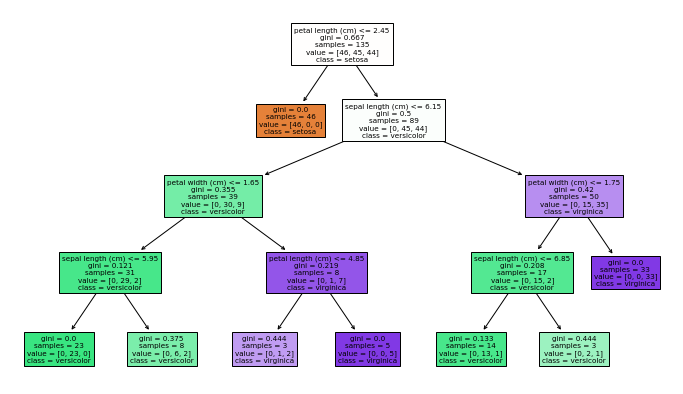

In [59]:
plt.figure(figsize=(12, 7))
plot_tree(best_dt, feature_names=dataset.feature_names, class_names=dataset.target_names, filled =True)
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# n_estimator = 
RandomForestClassifier()